In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, interp1d

In [50]:
#Exp1: 18/09, Exp2: 20/09, Exp3: 20/10
Exp1_time = [127, 247, 367, 487, 607, 732, 852, 1032, 1922, 3732]
Exp2_time = [140, 260, 380, 500, 620, 740, 870, 1050, 1950, 3750]
Exp3_time = [125, 250, 370, 494, 621, 741, 868, 1054, 1962, 3762]
exp_time = [Exp1_time, Exp2_time, Exp3_time]
exp_stop_time = [4604, 4764, 4621] # Time identified from the PCAP data 

Exp1_data = [2030.11, 1495.71, 1155.13, 628.36, 531.54, 289.69, 234.99, 176.48, 144.65, 162.19]
Exp2_data = [1704.39, 1476.42, 1292.76, 1067.22, 767.64, 209.29, 174.57, 221.29, 137.35, 107.61]
Exp3_data = [1803.12, 1254.7, 940.73, 460.25, 226.65, 144.26, 107.25, 66.35, 50.73, 66.63]
exp_data = [Exp1_data, Exp2_data, Exp3_data]

In [16]:
def LagrangeInterpolation(time, data):
    fig = plt.figure(figsize = (10,8))
    for i in range(len(time)-4):
        time_sec = time[i:i+5]
        data_sec = data[i:i+5]
        f = lagrange(time, data)
        x_new = np.arange(min(time_sec), max(time_sec)+1, 1)
        plt.subplot(2,4,i+1)
        plt.plot(x_new, f(x_new), 'b', time_sec, data_sec, 'ro')
        plt.grid()
    plt.show()

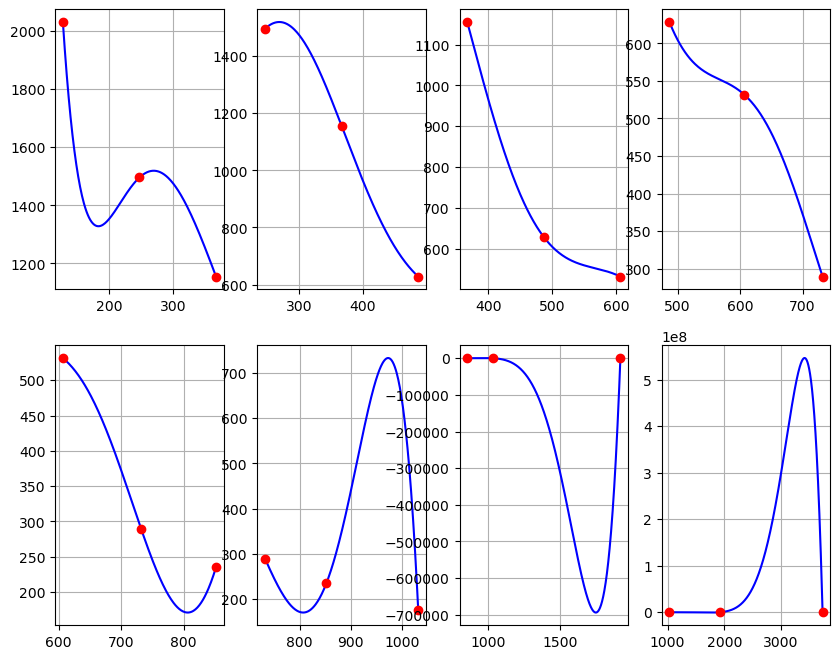

In [11]:
# 3 Point Interpolation
LagrangeInterpolation(Exp1_time, Exp1_data)

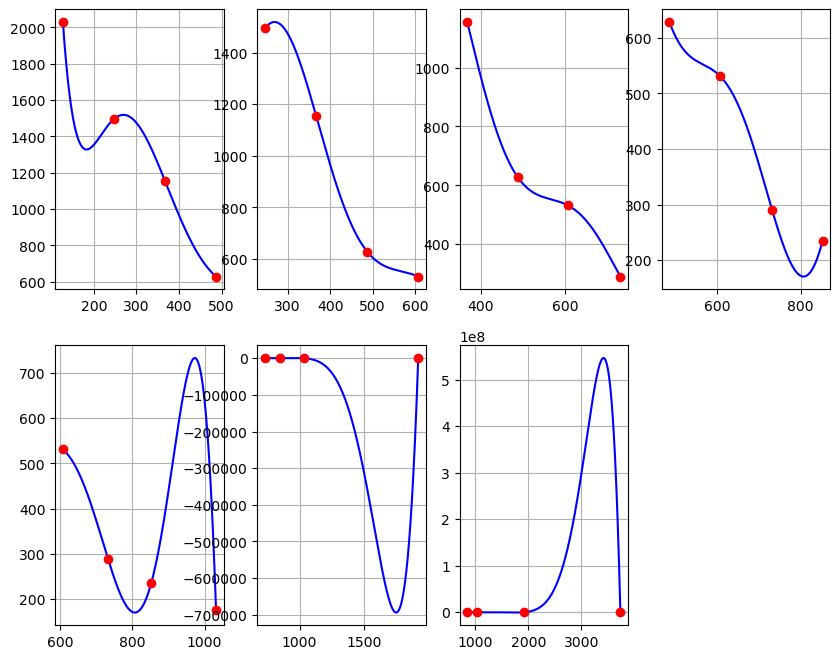

In [15]:
# 4 Point Interpolation
LagrangeInterpolation(Exp1_time, Exp1_data)

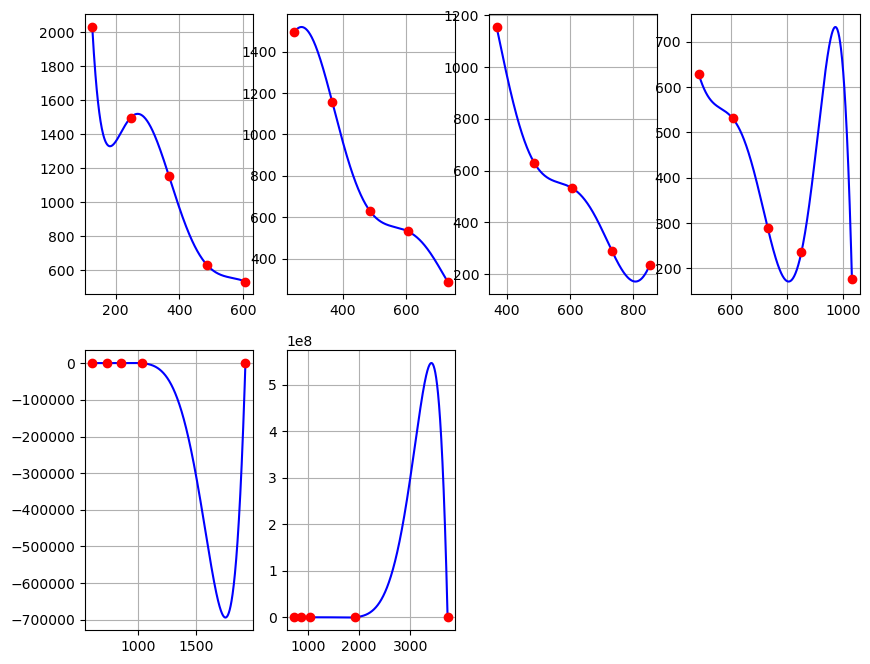

In [17]:
# 5 Point Interpolation
LagrangeInterpolation(Exp1_time, Exp1_data)

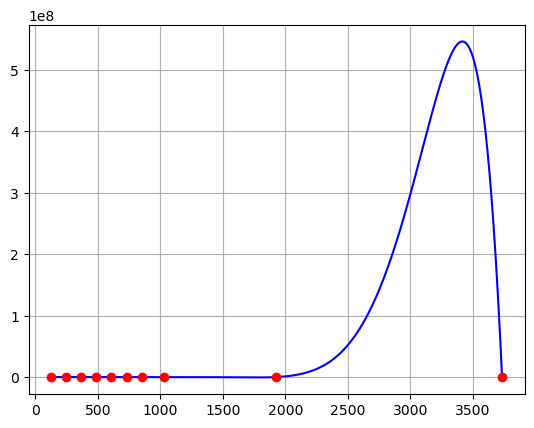

In [19]:
# All Points Interpolation
f = lagrange(Exp1_time, Exp1_data)
x_new = np.arange(min(Exp1_time), max(Exp1_time)+1, 1)
#plt.subplot(2,4,i+1)
plt.plot(x_new, f(x_new), 'b', Exp1_time, Exp1_time, 'ro')
plt.grid()
plt.show()

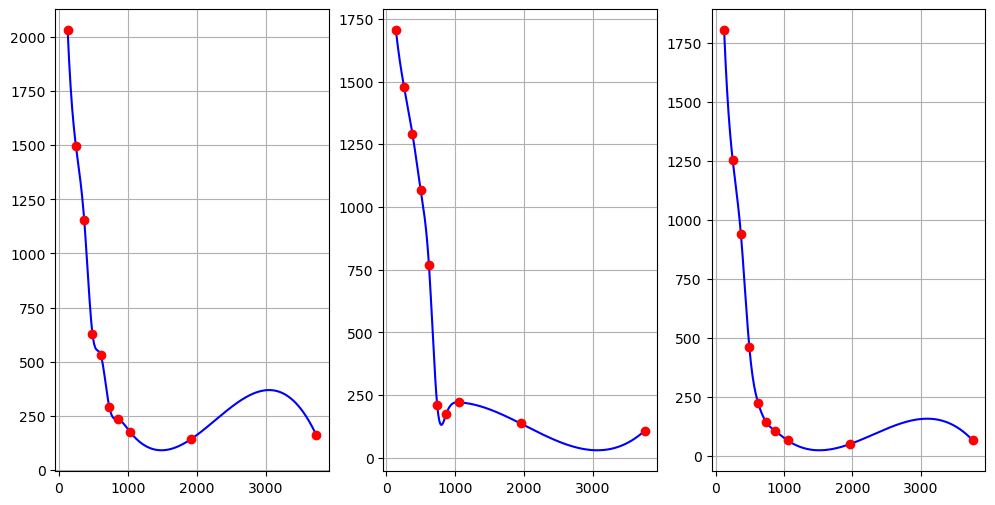

In [32]:
# All Point Cubic Interpolation 
plt.figure(figsize=(12,6))
for i in range(len(exp_time)):
    cubic_interpolation_model = interp1d(exp_time[i], exp_data[i], kind = "cubic")
    
    # Plotting the Graph
    X_=np.linspace(min(exp_time[i]), max(exp_time[i]), 500)
    Y_=cubic_interpolation_model(X_)
    plt.subplot(1,3,i+1)
    plt.plot(X_, Y_, 'b', exp_time[i], exp_data[i], 'ro')
    plt.grid()
plt.show()

In [51]:
time = []
data = []
for i in range(len(exp_time)):
    cubic_interpolation_model = interp1d(exp_time[i], exp_data[i], kind = "cubic")
    X_=np.arange(min(exp_time[i]), max(exp_time[i])+1, 1)
    Y_=cubic_interpolation_model(X_)
    dic = {'Time': list(X_), 'Data': list(Y_)} 
    df_exp = pd.DataFrame(dic)
    Filename = "ConcInterpExp" + str(i+1) + ".csv"
    df_exp.to_csv(Filename)

ValueError: A value (3733.0) in x_new is above the interpolation range's maximum value (3732).

# Interpolation for Experiment 4

In [72]:
start_time = np.array([0, 600, 1200, 1800, 2520, 3000, 3600, 4200, 4800, 5400])
conc = np.array([58.55, 28.17, 24.89, 22.75, 23.79, 23.85, 20.6, 21.45, 20.99, 19.8])
n_frames = np.array([1531, 90, 95, 108, 104, 30, 92, 95, 101, 96, 98, 18])
n_frames = n_frames[1:-1] # Ignoring smoke generation and BG samples
end_time = start_time + n_frames

In [66]:
time = []
data = []
cubic_interpolation_model = interp1d(start_time, conc, kind = "cubic", fill_value='extrapolate')
for i in range(len(start_time)):
    X_=np.arange(start_time[i], end_time[i], 1)
    Y_=cubic_interpolation_model(X_)
    time.extend(X_)
    data.extend(Y_)

In [68]:
dic = {'Time': time, 'Data': data} 
df_exp4 = pd.DataFrame(dic)
Filename = "ConcInterpExp4.csv"
df_exp4.to_csv(Filename)

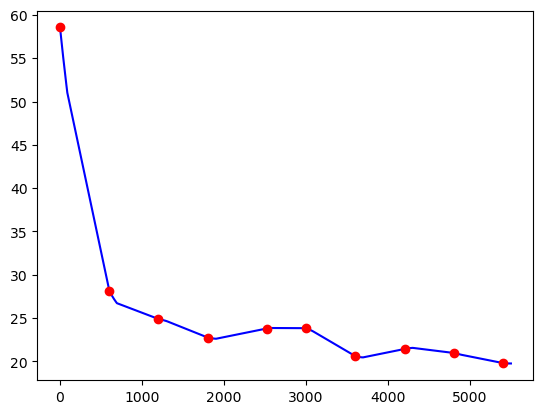

In [73]:
plt.plot(df_exp4['Time'], df_exp4['Data'], 'b', start_time, conc, 'ro')

# Prepared by Muthukumar G